In [2]:
pip install pysindy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

import pysindy as ps

import warnings

import matplotlib.pyplot as plt

plt.ion()

# ignore user warnings
warnings.filterwarnings("ignore", category=UserWarning)

integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12


from utils import (
    compare_methods,
    print_equations,
    compare_coefficient_plots,
    plot_sho,
    plot_lorenz,
)

In [7]:
if __name__ != "testing":
    from example_data import gen_data1
    from example_data import gen_data2
else:
    from mock_data import gen_data1
    from mock_data import gen_data2

In [8]:
t, x, y = gen_data1()
print(gen_data1())
X = np.stack((x, y), axis=-1)  # First column is x, second is y
print(X)

(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.7474

In [19]:
differentiation_method = ps.FiniteDifference(order=2)

feature_library = ps.PolynomialLibrary(degree=3) #why is the degree different than the polynomial order? In Example they're the same

optimizer = ps.STLSQ(threshold=0.2)

(x)' = -2.000 x
(y)' = 1.000 y


(x)' = -1.999 x
(y)' = 1.000 y




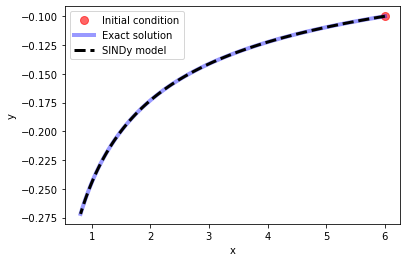

(x)' = -2.000 x
(y)' = 1.000 y




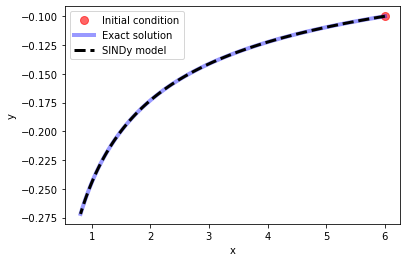

(x)' = -0.610 x + 0.382 x^2 + -0.539 x y + -1.498 x^2 y
(y)' = 1.000 y


(x)' = -4.212 x + 3.371 y + -0.209 x^2 + -0.162 x y + -2.965 y^2 + 1.779 x^2 y + 0.531 y^3
(y)' = 0.999 y




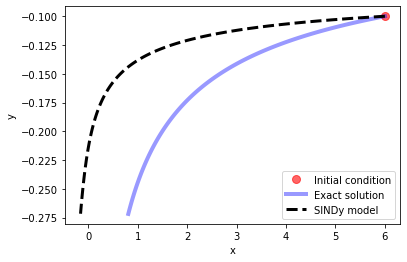

(x)' = -200165.992 1 + -255697.281 x + 189202.338 y + -20422.162 x^2 + 417185.126 x y + -63696.646 y^2 + 440.536 x^3 + 121367.020 x^2 y + -150124.494 x y^2 + 9168.307 y^3
(y)' = 0.752 1




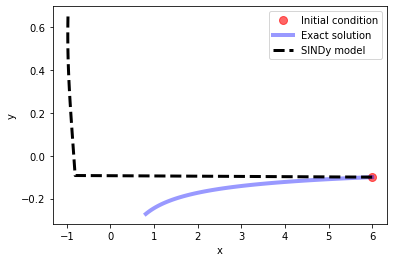

(x)' = -14110570.892 1 + -17432833.770 x + 13659304.088 y + -1375069.534 x^2 + 28849063.394 x y + -4728241.139 y^2 + 29883.595 x^3 + 8201371.754 x^2 y + -10582928.172 x y^2 + 702125.340 y^3
(y)' = 4663684.285 1 + 5759139.508 x + -4515549.190 y + 454070.619 x^2 + -9532758.741 x y + 1563430.398 y^2 + -9863.895 x^3 + -2708818.710 x^2 y + 3497763.215 x y^2 + -232214.406 y^3




/home/nanohub/new_username/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


ValueError: Input contains NaN.

In [25]:
#model
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="finite_difference", k=1),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SmoothedFiniteDifference(),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="savitzky_golay", left=0.5, right=0.5, order=3),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')


model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="spline", s=1e-2),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="trend_filtered", order=0, alpha=1e-2),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="spectral"),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SpectralDerivative(),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')
sim = model.simulate([x0, y0], t=t_test)

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=ps.SINDyDerivative(kind="kalman", alpha=0.05),
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('\n')

sim = model.simulate([x0, y0], t=t_test)


plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)
model.fit(X, t=t)
model.print()
print('Repeat of original')

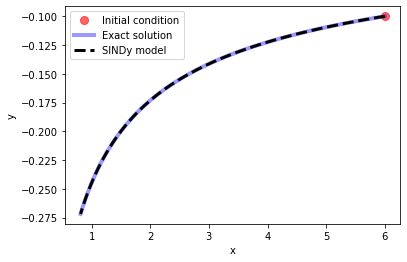

In [23]:
#simulate
x0, y0, t_test, x_test, y_test = gen_data2()
sim = model.simulate([x0, y0], t=t_test)

#import matplotlib.pyplot as plt
#plt.ion() #interactive on

plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

